What is LangGraph?
- library for building stateful, multi-actor applications with LLM, used to create agent and multi-agent workflows.
- core benefits : cycles, controllability and persistence.


Why LangGraph?
  - Simplifies development: State Management and agent co-ordintaion
    - e.g: Chatbot - State Mangament and Agent Co-Ordination. Among below agents.
      - Agent 1 : Google Search
      - Agent 2 : Wiki Search
      - Agent 3 : VectorDB Search
  - Flexibility:
    - Developers have flexibility to define thier own logic and communication protocols.
  - Scalability:
    - Can built Large Scale MultiAgent Application -> Handle high vlume of interactions and complex workflows.
  - Fault Tolerance:
    - Handle errors, Fault Tolerance mechanism

### Chatbots with LangGraph

##Use Case

- Start -> Chatbot -> End
- Chatbot -> LLM

In [ ]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 22.3 MB/s eta 0:00:00


In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith_api_key=userdata.get('LANGSMITH_API_KEY')

In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "LangGraphDemo"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b190afa6720>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b190932baa0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
### Start building Chatbot using LangGraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    """
    Messages have the type "list".
    The 'add_message' function in the annotation defines how this state key should be updated.
    ( in this case, it appends messages to the list, rather than overwritng them)
    """
    messages: Annotated[list, add_messages]

graph_builder=StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages": llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot", chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

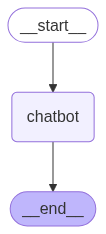

In [ ]:
graph=graph_builder.compile()
graph

In [ ]:
from langchain_core.messages import HumanMessage

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break
    # Correctly format the user message as a HumanMessage
    user_message = HumanMessage(content=user_input)
    for event in graph.stream({"messages": [user_message]}):
        for value in event.values():
            # Check if the value has the expected 'messages' structure before accessing content
            if 'messages' in value and hasattr(value['messages'], 'content'):
                 print("Assistant:", value['messages'].content)
            # If the value is a list of messages, iterate and print
            elif isinstance(value.get('messages'), list):
                 for msg in value['messages']:
                     if hasattr(msg, 'content'):
                         print("Assistant:", msg.content)

User: hello
Assistant: Hello! 👋 

How can I help you today? 😊

User: what is Gen AI
Assistant: Gen AI stands for **Generative Artificial Intelligence**. 

It's a type of artificial intelligence that focuses on creating new content, rather than just analyzing existing data. Think of it as AI that can "imagine" and "build" things.

Here's a breakdown:

**What it does:**

* **Generates text:**  Writes stories, poems, articles, code, scripts, and more.
* **Creates images:**  Produces paintings, photographs, illustrations, and other visual content.
* **Composes music:**  Writes melodies, harmonies, and entire musical pieces.
* **Designs objects:**  Creates 3D models of products, buildings, and other physical objects.
* **Translates languages:**  Converts text from one language to another.
* **Summarizes information:**  Condenses large amounts of text into shorter summaries.

**How it works:**

Gen AI models are typically trained on massive datasets of existing content. This allows them to l